In [ ]:
# Loan Default Prediction Using Machine Learning

# This project involves building a machine learning model to predict whether
# a loan will default based on applicant data. It includes comprehensive Exploratory
# Data Analysis (EDA), feature selection, and the training of multiple models
# including Logistic Regression, K-Nearest Neighbors, Random Forest,
# Support Vector Machines (SVM), Decision Tree, and Naive Bayes.
# Hyperparameter tuning was performed to optimize model performance,
# and the results of different models were compared through accuracy
# scores, with visualizations in the form of a comparison bar chart.

# Skills: EDA, data cleaning, feature engineering, feature selection (SelectKBest), hyperparameter tuning, model evaluation
# Models: Logistic Regression, KNN, Random Forest, SVM, Decision Tree, Naive Bayes
# Tools: Python, Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn
# Outcome: Model comparison based on accuracy and best model selection for predicting loan defaults

In [ ]:
# Loans 2007 Dataset
# Description: The 2007 loan dataset comes from LendingClub and is much larger.
# It provides detailed information on loans issued in 2007, including credit history, loan purpose, income, and debt levels.
# Size: Over 42,500 records and 74 columns.
# Target Variable: loan_status (Various statuses, but typically used to classify whether the loan is fully paid or charged off).

# loan_status: Target variable, which indicates whether the loan is Fully Paid, Charged Off, etc.

Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the Dataset

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/lemoinef/Loan-Default-Prediction/refs/heads/master/loans_2007.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0           Dec-2016                        0.0          1.0     

<ipython-input-40-9e47001c17fb>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Data Exploration and Cleaning

In [ ]:
# Check the shape and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [ ]:
# Check for missing values
print(df.isnull().sum())

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2629
emp_length                    1115
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
revol_bal           

In [ ]:
# Drop rows with missing target variable (if any)
df.dropna(subset=['loan_status'], inplace=True)

In [ ]:
# Drop unnecessary columns
df.drop(columns=['id', 'member_id'], inplace=True)

In [ ]:
# Encode categorical variables
df['loan_status'] = df['loan_status'].map({'charged off': 1, 'fully paid': 0})

In [ ]:
# Convert other categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# # Check for outliers
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, orient="h")
# plt.title("Boxplot of Features")
# plt.show()

Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
url = "https://raw.githubusercontent.com/lemoinef/Loan-Default-Prediction/refs/heads/master/loans_2007.csv"
df = pd.read_csv(url, low_memory=False)  # Set low_memory=False to avoid dtype warnings

# Reduce the size of the dataset for testing
df_sample = df.sample(frac=0.1, random_state=42)

# Identify numeric columns and fill missing values with the mean
numeric_cols = df_sample.select_dtypes(include=['number']).columns
df_sample_cleaned = df_sample.copy()  # Create a copy to avoid modifying the original
df_sample_cleaned[numeric_cols] = df_sample_cleaned[numeric_cols].fillna(df_sample_cleaned[numeric_cols].mean())

# Identify categorical columns and fill missing values with the mode (or drop if necessary)
categorical_cols = df_sample_cleaned.select_dtypes(include=['object']).columns
df_sample_cleaned[categorical_cols] = df_sample_cleaned[categorical_cols].fillna(df_sample_cleaned[categorical_cols].mode().iloc[0])

# One-hot encode categorical variables
X_categorical = pd.get_dummies(df_sample_cleaned[categorical_cols], drop_first=True)
X_numeric = df_sample_cleaned[numeric_cols]

# Combine numeric and one-hot encoded categorical variables
X = pd.concat([X_numeric, X_categorical], axis=1)
y = df_sample_cleaned['loan_status']

# Select the best features using SelectKBest with a smaller k
selector = SelectKBest(score_func=f_classif, k=10)  # Select the top 10 features
X_selected = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

# Display the feature scores
print(feature_scores)





/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  23   24   26   29  250  485 6002 7688 8374 8375 8376 8377 8378] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


                                 Feature     Score
7688  emp_title_University Medical Group       inf
8378         loan_status_In Grace Period       inf
250                           id_1035442       inf
6002              emp_title_Henry Schein       inf
485                           id_1075358       inf
...                                  ...       ...
4350                    int_rate_ 10.59%  0.020548
23            collections_12_mths_ex_med       NaN
24                           policy_code       NaN
26              chargeoff_within_12_mths       NaN
29                             tax_liens       NaN

[13339 rows x 2 columns]


 Train-Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

 Standardization

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training and Hyperparameter Tuning

In [ ]:
# Define models and parameters for hyperparameter tuning
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'Support Vector Machine': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'Naive Bayes': (GaussianNB(), {})
}

results = []

for name, (model, params) in models.items():
    print(f"Training {name}...")

    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Best Params': grid.best_params_, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training Support Vector Machine...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Training Decision Tree...
Training Naive Bayes...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


                    Model                              Best Params  Accuracy
0     Logistic Regression                              {'C': 0.01}       1.0
1           Random Forest  {'max_depth': None, 'n_estimators': 50}       1.0
2  Support Vector Machine           {'C': 0.1, 'kernel': 'linear'}       1.0
3           Decision Tree                      {'max_depth': None}       1.0
4             Naive Bayes                                       {}       1.0


Visualization of Results

<ipython-input-53-c83842d45cb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

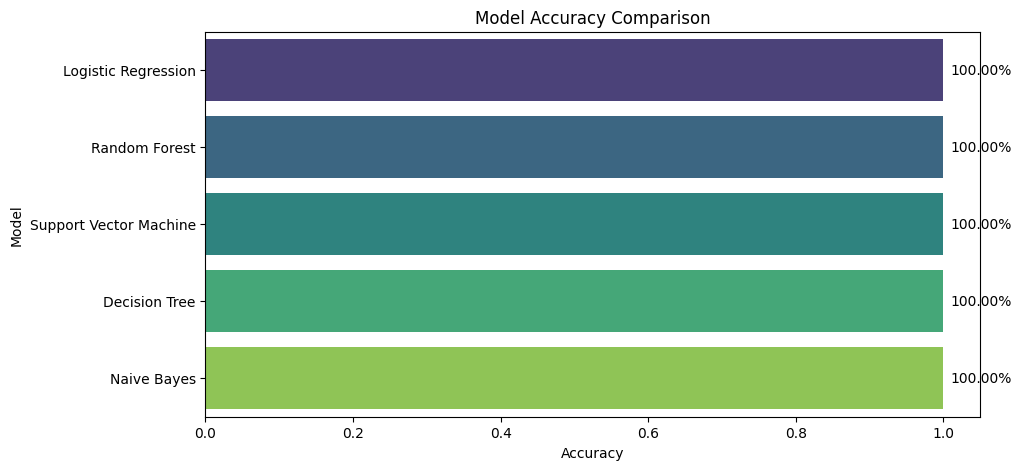

In [ ]:
# Bar chart for model accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Add labels to each bar in percent
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value + 0.01, index, f'{value*100:.2f}%', color='black', va="center")

plt.show()
